In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
image = np.array([[[[1],[2],[3]],
                  [[4],[5],[6]],
                  [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)

(1, 3, 3, 1)


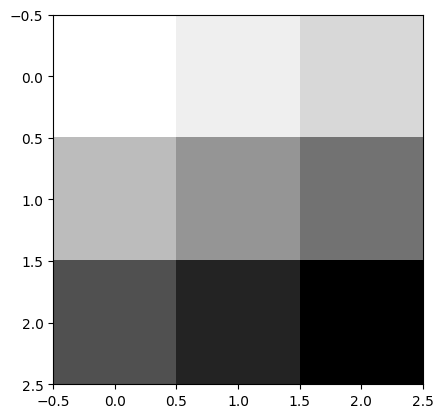

In [3]:
plt.imshow(image.reshape(3,3), cmap='Greys')

In [4]:
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print(f"weight.shape = {weight.shape}")

weight.shape = (2, 2, 1, 1)


In [ ]:
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding="VALID")
conv2d_img = conv2d.numpy()
print(conv2d_img.shape)

(1, 2, 2, 1)


[[12. 16.]
 [24. 28.]]


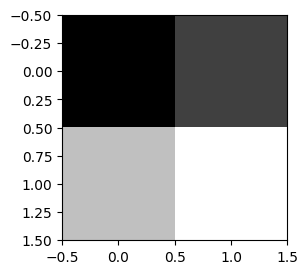

In [ ]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
  print(one_img.reshape(2,2))
  plt.subplot(1,2,i+1)
  plt.imshow(one_img.reshape(2,2),cmap='gray')

image.shape = (1, 3, 3, 1)
weight.shape = (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


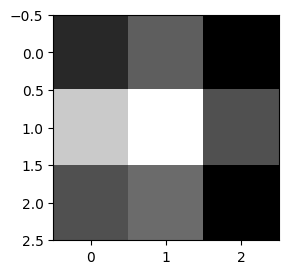

In [ ]:
# padding = same
print(f"image.shape = {image.shape}")
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print(f"weight.shape = {weight.shape}")

conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding="SAME")
conv2d_img = conv2d.numpy()
print(f"conv2d_img.shape {conv2d_img.shape}")

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
  print(one_img.reshape(3,3))
  plt.subplot(1,2,i+1)
  plt.imshow(one_img.reshape(3,3),cmap='gray')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


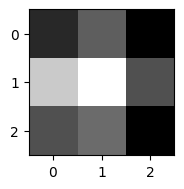

In [ ]:
print("image.shape", image.shape)

weight = tf.constant([[[[1.,10.,-1.]], [[1.,10.,-1.]]],
                      [[[1.,10.,-1.,]], [[1.,10.,-1.]]]])
print("weight.shape", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding="SAME")
comv2d_img = conv2d.numpy()
print("conv2d_img.shape", conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0,3)
for i, one_img in enumerate(conv2d_img):
  print(one_img.reshape(3,3))
  plt.subplot(1,3,i+1)
  plt.imshow(one_img.reshape(3,3),cmap='gray')

In [ ]:
image = np.array([[[[4],[3]],
                   [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1,2,2,1],
                      strides = [1,1,1,1], padding="SAME")
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


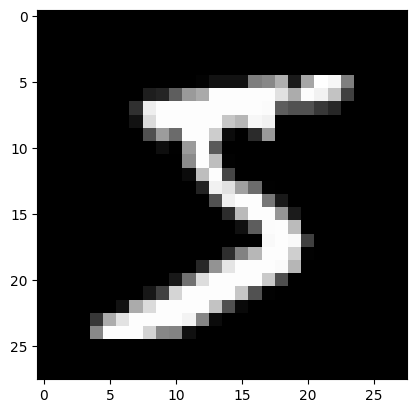

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img = x_train[0].reshape(28,28)
plt.imshow(img, cmap='gray')


In [ ]:
img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random.normal([3,3,1,5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1,2,2,1], padding="SAME")
print(conv2d.shape)

(1, 14, 14, 5)


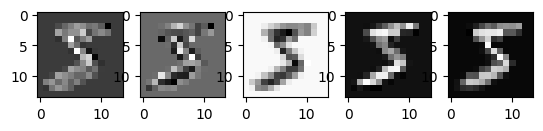

In [ ]:
conv2d_img = conv2d.numpy()
conv2d_img = np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
  plt.subplot(1,5,i+1)
  plt.imshow(one_img.reshape(14,14),cmap='gray')

(1, 7, 7, 5)


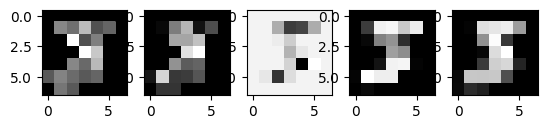

In [ ]:
pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1],
                      strides = [1,2,2,1], padding="SAME")
print(pool.shape)
pool_img = pool.numpy()
pool_img = np.swapaxes(pool_img,0,3)
for i, one_img in enumerate(pool_img):
  plt.subplot(1,5,i+1)
  plt.imshow(one_img.reshape(7,7),cmap='gray')